In [5]:
# Load Data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Network Architecture
from tensorflow import keras 
from keras import layers 
model = keras.Sequential([layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")])

# Compilation step
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Processing image data
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# Make prefictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
print(predictions[0])

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2659 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1088 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0707 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 5/5
1/1 [==============================] - 0s 67ms/step
[1.1805277e-07 1.7304838e-09 7.0199562e-06 1.0362913e-04 5.5528256e-11
 1.5512505e-07 7.5113778e-12 9.9988270e-01 1.2801827e-07 6.2909444e-06]


In [6]:
# Evaluating
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9791
test_acc: 0.9790999889373779


(28, 28)


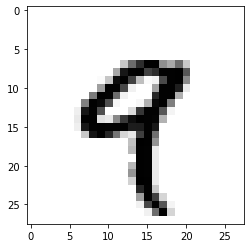

In [14]:
# Display a digit
import matplotlib.pyplot as plt
digit = train_images[4].reshape((28,28))
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [20]:
# Dense from scratch
import tensorflow as tf
import numpy as np
import math

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        return [self.W, self.b]

class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
    
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

# Mock model
model = NaiveSequential([
        NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
        NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)])

assert len(model.weights) == 4

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images)/batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

# Update weights
learning_rate = 1e-3
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

# Gradient Compute
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

# Fit Model
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 ==0:
                print(f"loss at batch {batch_counter} : {loss:.2f}")

# Test
from tensorflow import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0 : 6.03
loss at batch 100 : 2.23
loss at batch 200 : 2.20
loss at batch 300 : 2.10
loss at batch 400 : 2.22
Epoch 1
loss at batch 0 : 1.89
loss at batch 100 : 1.86
loss at batch 200 : 1.82
loss at batch 300 : 1.71
loss at batch 400 : 1.82
Epoch 2
loss at batch 0 : 1.56
loss at batch 100 : 1.57
loss at batch 200 : 1.49
loss at batch 300 : 1.42
loss at batch 400 : 1.50
Epoch 3
loss at batch 0 : 1.30
loss at batch 100 : 1.33
loss at batch 200 : 1.23
loss at batch 300 : 1.21
loss at batch 400 : 1.27
Epoch 4
loss at batch 0 : 1.11
loss at batch 100 : 1.15
loss at batch 200 : 1.04
loss at batch 300 : 1.05
loss at batch 400 : 1.10
Epoch 5
loss at batch 0 : 0.97
loss at batch 100 : 1.01
loss at batch 200 : 0.90
loss at batch 300 : 0.93
loss at batch 400 : 0.98
Epoch 6
loss at batch 0 : 0.86
loss at batch 100 : 0.91
loss at batch 200 : 0.80
loss at batch 300 : 0.85
loss at batch 400 : 0.89
Epoch 7
loss at batch 0 : 0.78
loss at batch 100 : 0.82
loss at batch 200 : 0.72
lo

In [21]:
# Evaluating Mock Model
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82
